In [1]:
# Importing all the modules and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('energydata_complete.csv')
df.head()

,recorded_timestamp,total_energy_use,lighting_energy_use,temp_sensor_1,humidity_sensor_1,temp_sensor_2,humidity_sensor_2,temp_sensor_3,humidity_sensor_3,temp_sensor_4,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11-01-2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11-01-2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   recorded_timestamp    19735 non-null  object 
 1   total_energy_use      19735 non-null  int64  
 2   lighting_energy_use   19735 non-null  int64  
 3   temp_sensor_1         19735 non-null  float64
 4   humidity_sensor_1     19735 non-null  float64
 5   temp_sensor_2         19735 non-null  float64
 6   humidity_sensor_2     19735 non-null  float64
 7   temp_sensor_3         19735 non-null  float64
 8   humidity_sensor_3     19735 non-null  float64
 9   temp_sensor_4         19735 non-null  float64
 10  humidity_sensor_4     19735 non-null  float64
 11  temp_sensor_5         19735 non-null  float64
 12  humidity_sensor_5     19735 non-null  float64
 13  temp_sensor_6         19735 non-null  float64
 14  humidity_sensor_6     19735 non-null  float64
 15  temp_sensor_7      

In [4]:
df['recorded_timestamp'] = pd.to_datetime(df['recorded_timestamp'], format='%d-%m-%Y %H:%M')
df['recorded_timestamp'].head()

0   2016-01-11 17:00:00
1   2016-01-11 17:10:00
2   2016-01-11 17:20:00
3   2016-01-11 17:30:00
4   2016-01-11 17:40:00
Name: recorded_timestamp, dtype: datetime64[ns]

In [5]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.dropna(axis=1, how='all')

Exploratory Data Analysis

In [6]:
df.describe()

,recorded_timestamp,total_energy_use,lighting_energy_use,temp_sensor_1,humidity_sensor_1,temp_sensor_2,humidity_sensor_2,temp_sensor_3,humidity_sensor_3,temp_sensor_4,...,temp_sensor_9,humidity_sensor_9,external_temp,atmospheric_pressure,external_humidity,wind_speed_mps,visibility_km,dew_point_temp,random_variable_1,random_variable_2
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,2016-03-20 05:30:00,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
min,2016-01-11 17:00:00,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,2016-02-14 23:15:00,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,2016-03-20 05:30:00,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,2016-04-23 11:45:00,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,2016-05-27 18:00:00,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634


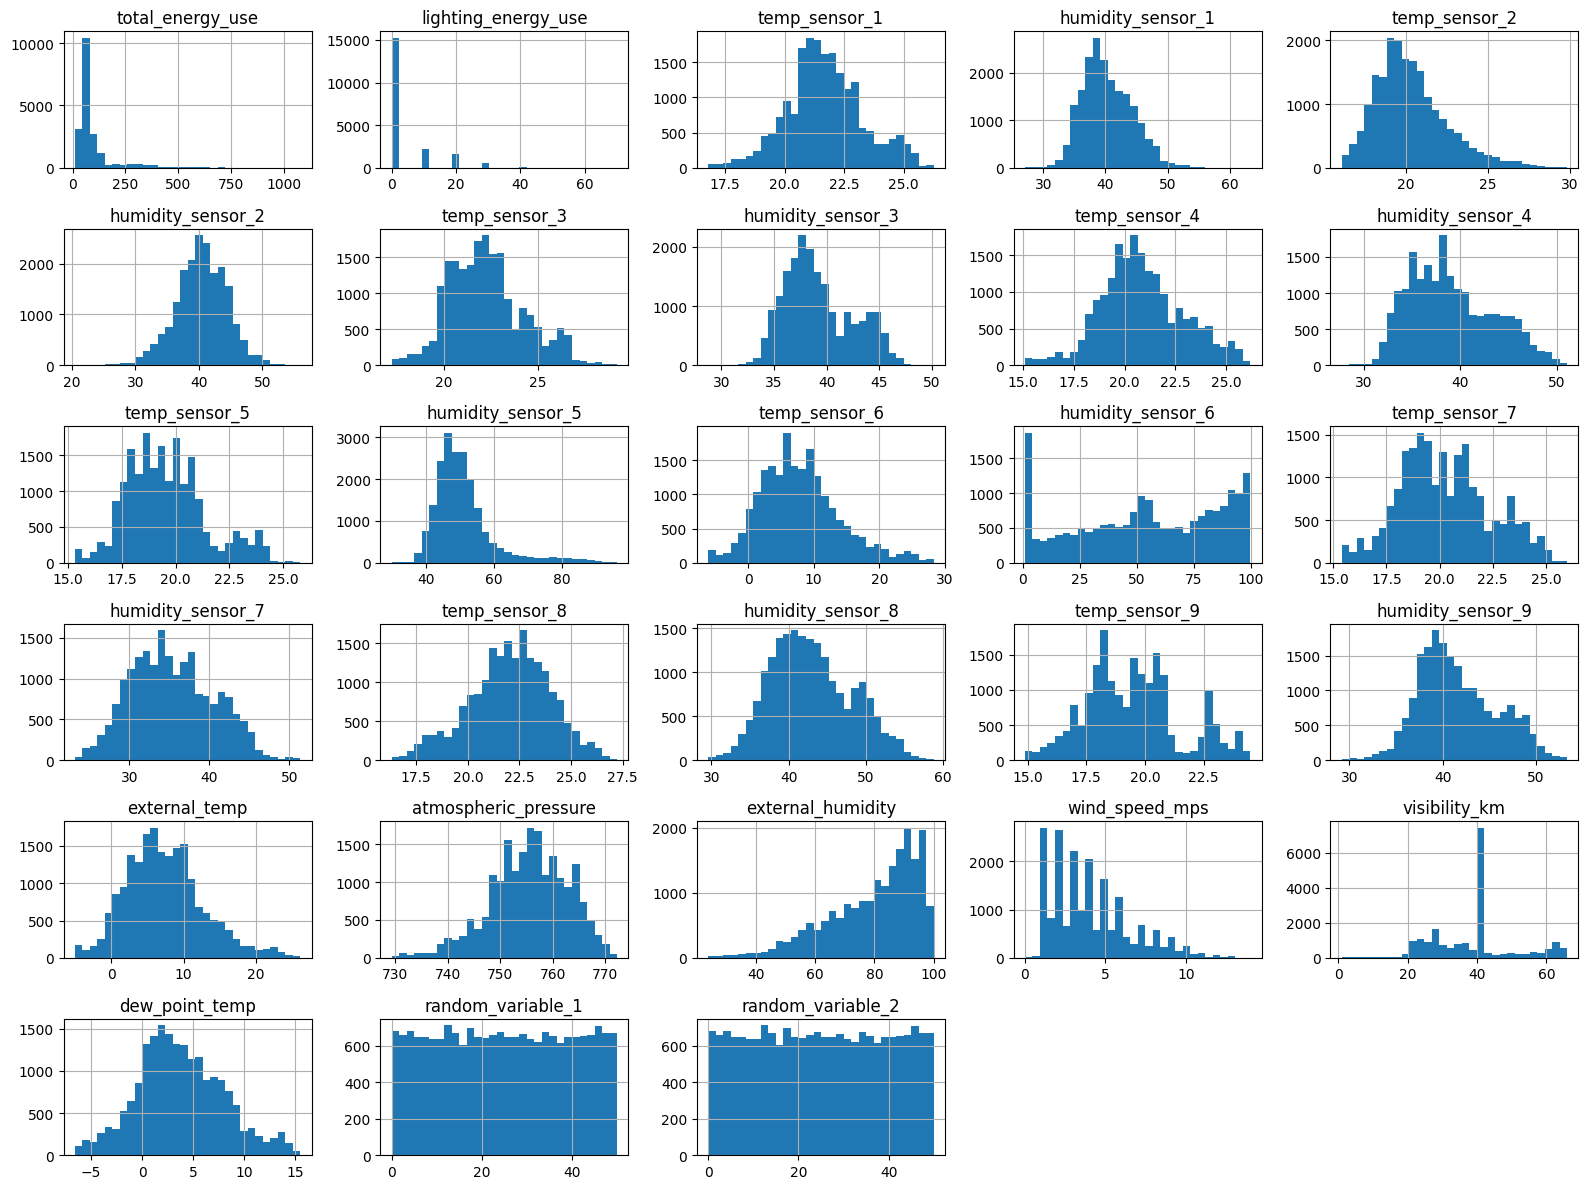

In [7]:
# Histograms for all numeric features
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].hist(figsize=(16, 12), bins=30)
plt.tight_layout()
plt.show()

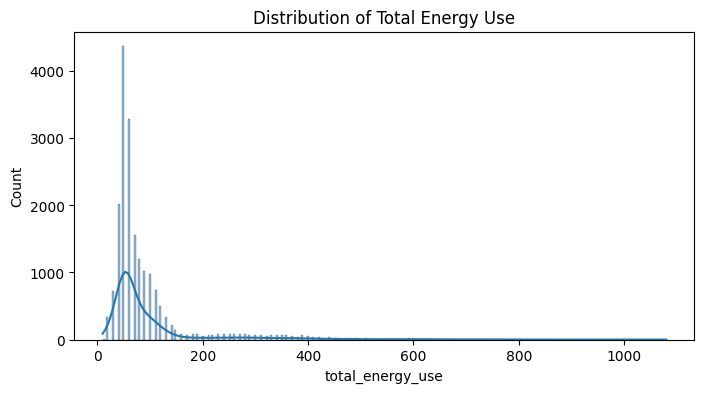

In [8]:
# Displaying the distribution of the target variable
plt.figure(figsize=(8,4))
sns.histplot(df['total_energy_use'], kde=True)
plt.title('Distribution of Total Energy Use')
plt.show()

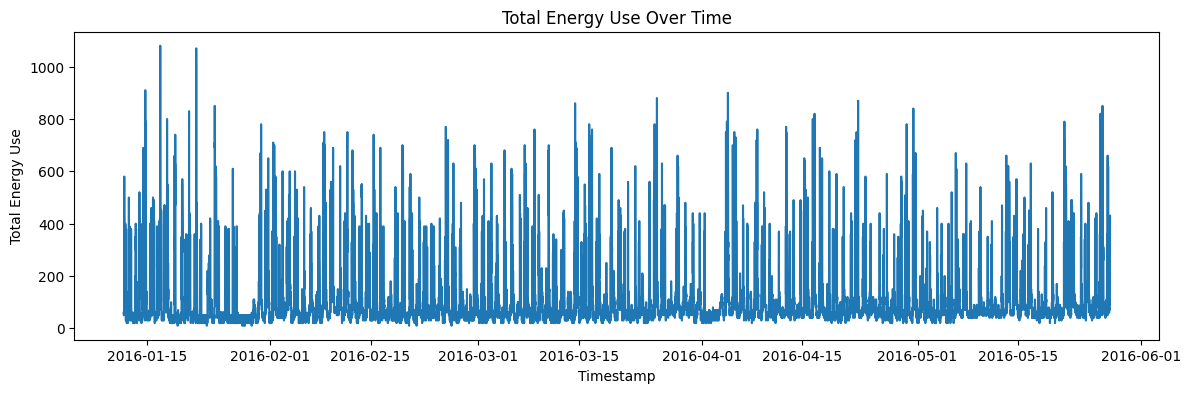

In [9]:
# Plot total energy use over time
plt.figure(figsize=(14,4))
plt.plot(df['recorded_timestamp'], df['total_energy_use'])
plt.title('Total Energy Use Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Total Energy Use')
plt.show()

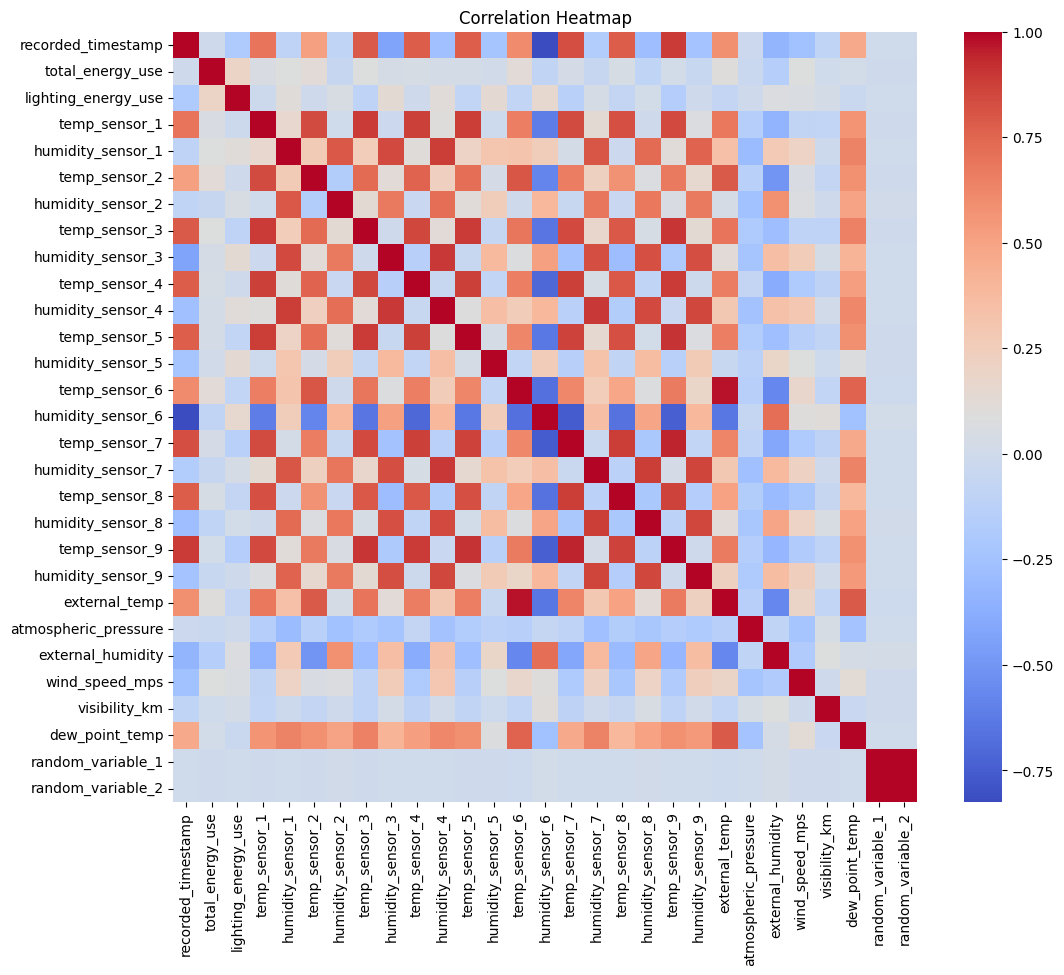

In [10]:
# Correlation heatmap to visualize relationships between features
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

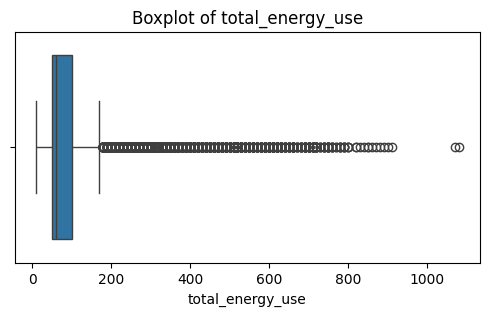

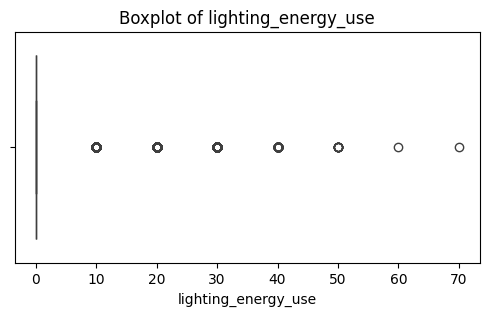

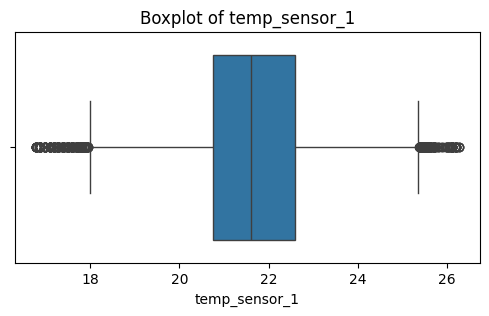

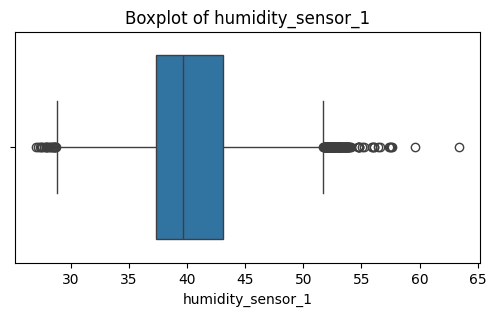

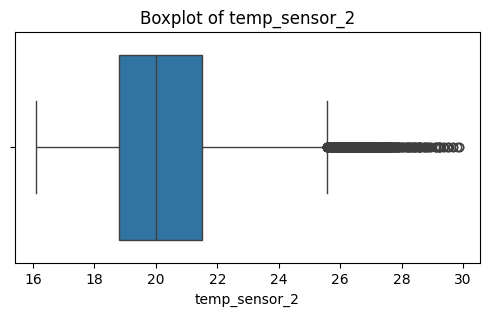

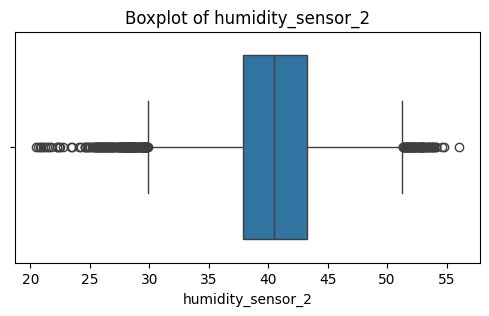

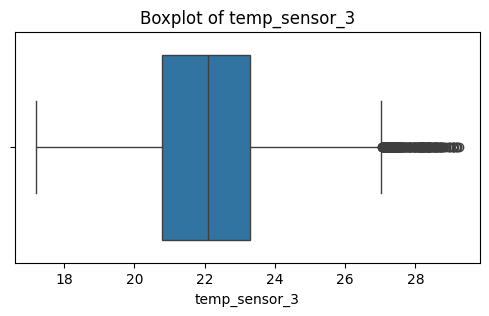

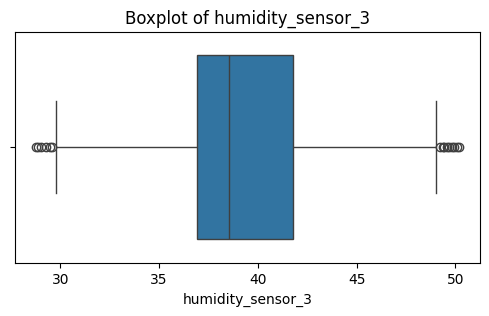

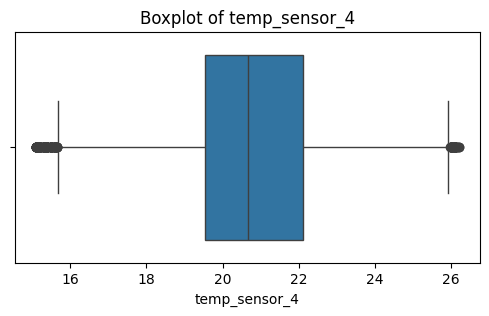

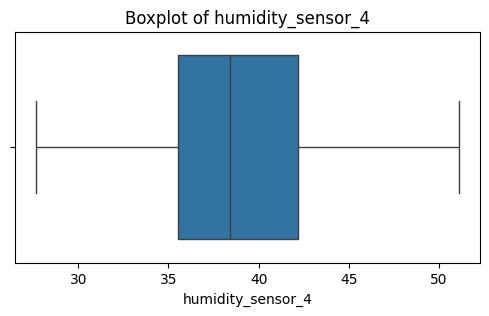

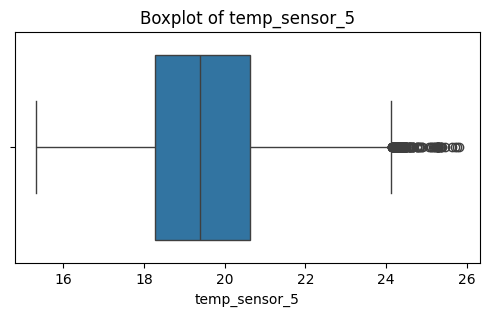

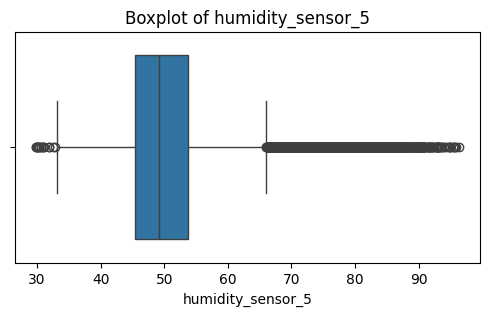

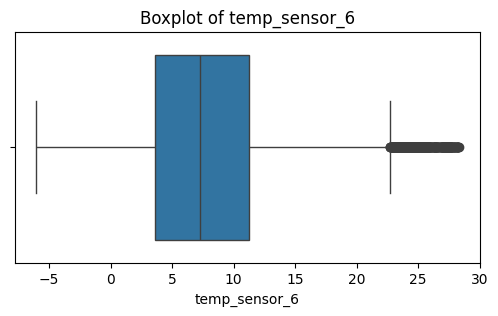

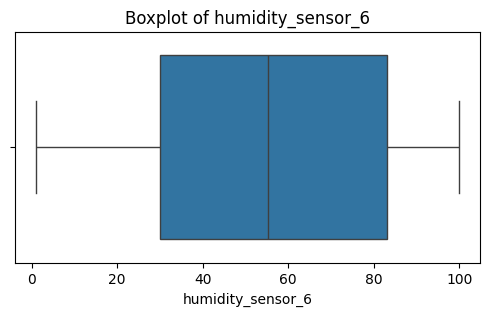

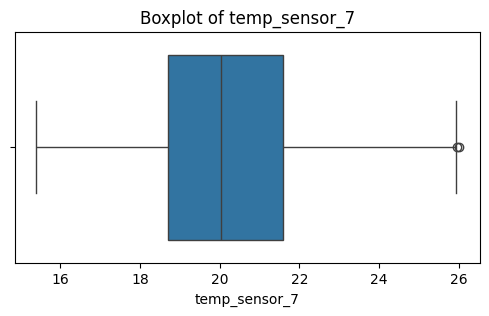

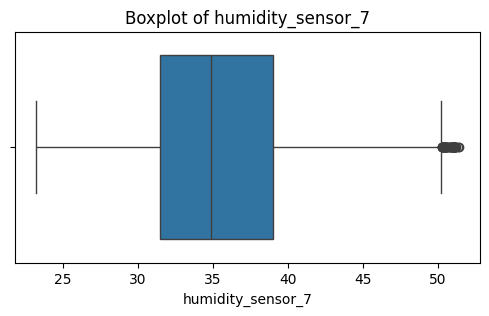

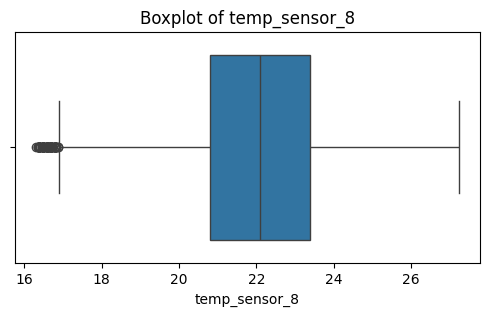

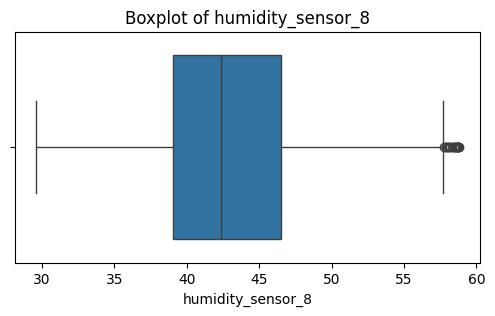

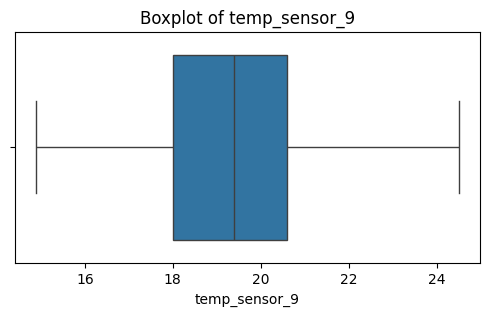

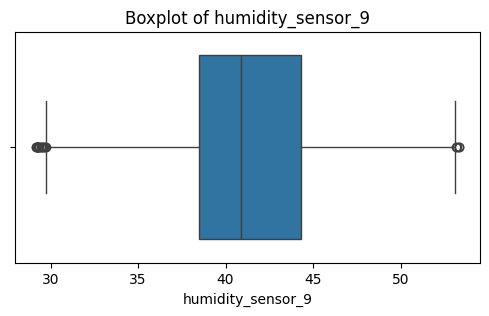

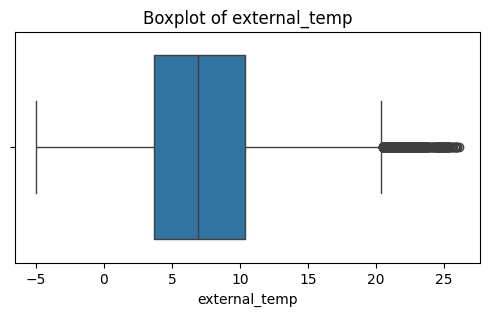

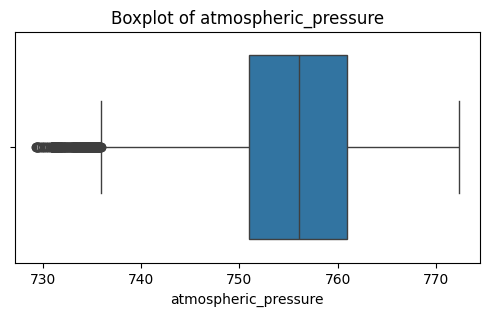

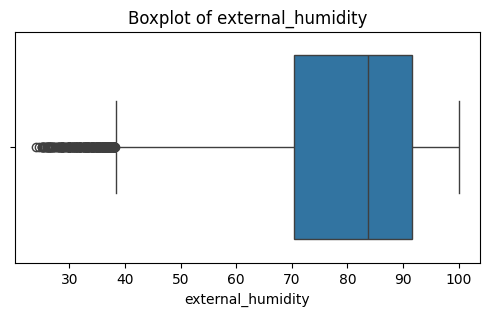

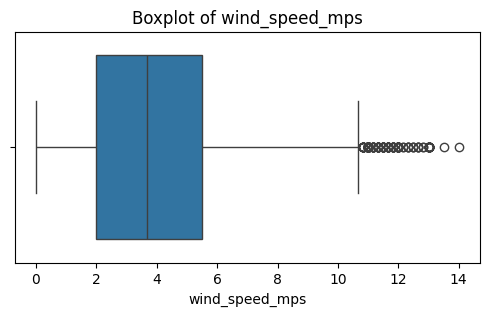

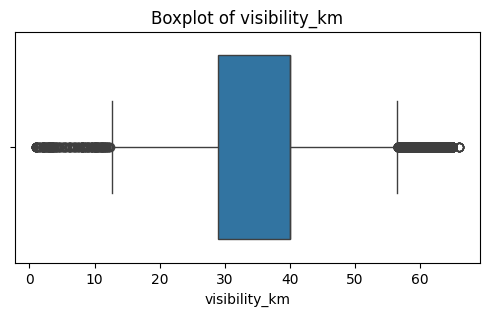

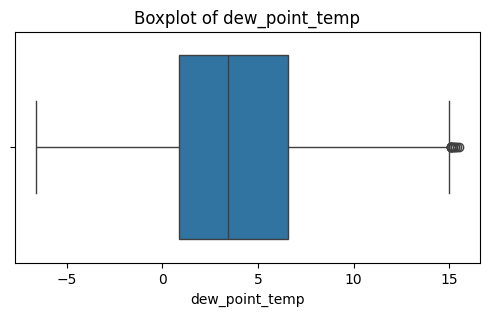

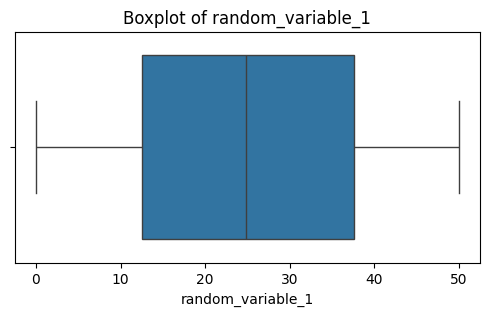

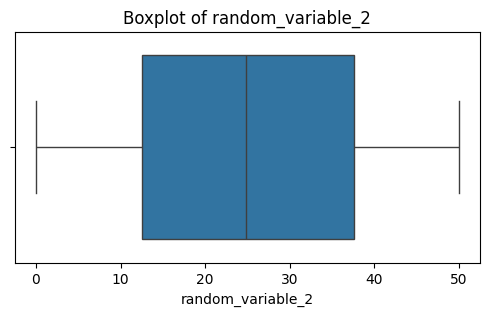

In [11]:
#Boxplots for outlier detection
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [12]:
# Checking for any missing values
df.isnull().sum()

recorded_timestamp      0
total_energy_use        0
lighting_energy_use     0
temp_sensor_1           0
humidity_sensor_1       0
temp_sensor_2           0
humidity_sensor_2       0
temp_sensor_3           0
humidity_sensor_3       0
temp_sensor_4           0
humidity_sensor_4       0
temp_sensor_5           0
humidity_sensor_5       0
temp_sensor_6           0
humidity_sensor_6       0
temp_sensor_7           0
humidity_sensor_7       0
temp_sensor_8           0
humidity_sensor_8       0
temp_sensor_9           0
humidity_sensor_9       0
external_temp           0
atmospheric_pressure    0
external_humidity       0
wind_speed_mps          0
visibility_km           0
dew_point_temp          0
random_variable_1       0
random_variable_2       0
dtype: int64

In [13]:
# Checking for outliers using IQR method

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    percent = (len(outliers) / len(df)) * 100
    print(f"{col}: {len(outliers)} outliers ({percent:.2f}%)")


total_energy_use: 2138 outliers (10.83%)
lighting_energy_use: 4483 outliers (22.72%)
temp_sensor_1: 515 outliers (2.61%)
humidity_sensor_1: 146 outliers (0.74%)
temp_sensor_2: 546 outliers (2.77%)
humidity_sensor_2: 235 outliers (1.19%)
temp_sensor_3: 217 outliers (1.10%)
humidity_sensor_3: 15 outliers (0.08%)
temp_sensor_4: 186 outliers (0.94%)
humidity_sensor_4: 0 outliers (0.00%)
temp_sensor_5: 179 outliers (0.91%)
humidity_sensor_5: 1330 outliers (6.74%)
temp_sensor_6: 515 outliers (2.61%)
humidity_sensor_6: 0 outliers (0.00%)
temp_sensor_7: 2 outliers (0.01%)
humidity_sensor_7: 42 outliers (0.21%)
temp_sensor_8: 71 outliers (0.36%)
humidity_sensor_8: 17 outliers (0.09%)
temp_sensor_9: 0 outliers (0.00%)
humidity_sensor_9: 21 outliers (0.11%)
external_temp: 440 outliers (2.23%)
atmospheric_pressure: 219 outliers (1.11%)
external_humidity: 239 outliers (1.21%)
wind_speed_mps: 214 outliers (1.08%)
visibility_km: 2522 outliers (12.78%)
dew_point_temp: 11 outliers (0.06%)
random_variab

In [14]:
# Handling Outliers by capping

# Define a function to cap outliers using IQR method
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower, upper)
    return df

# Apply capping to the selected columns
for col in numeric_cols:
    df = cap_outliers_iqr(df, col)

In [15]:
# Checking for outliers again after capping

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    percent = (len(outliers) / len(df)) * 100
    print(f"{col}: {len(outliers)} outliers ({percent:.2f}%)")


total_energy_use: 0 outliers (0.00%)
lighting_energy_use: 0 outliers (0.00%)
temp_sensor_1: 0 outliers (0.00%)
humidity_sensor_1: 0 outliers (0.00%)
temp_sensor_2: 0 outliers (0.00%)
humidity_sensor_2: 0 outliers (0.00%)
temp_sensor_3: 0 outliers (0.00%)
humidity_sensor_3: 0 outliers (0.00%)
temp_sensor_4: 0 outliers (0.00%)
humidity_sensor_4: 0 outliers (0.00%)
temp_sensor_5: 0 outliers (0.00%)
humidity_sensor_5: 0 outliers (0.00%)
temp_sensor_6: 0 outliers (0.00%)
humidity_sensor_6: 0 outliers (0.00%)
temp_sensor_7: 0 outliers (0.00%)
humidity_sensor_7: 0 outliers (0.00%)
temp_sensor_8: 0 outliers (0.00%)
humidity_sensor_8: 0 outliers (0.00%)
temp_sensor_9: 0 outliers (0.00%)
humidity_sensor_9: 0 outliers (0.00%)
external_temp: 0 outliers (0.00%)
atmospheric_pressure: 0 outliers (0.00%)
external_humidity: 0 outliers (0.00%)
wind_speed_mps: 0 outliers (0.00%)
visibility_km: 0 outliers (0.00%)
dew_point_temp: 0 outliers (0.00%)
random_variable_1: 0 outliers (0.00%)
random_variable_2: 0

Feature Engineering

In [16]:
for lag in range(1, 25):  # 24 previous time steps
    df[f'total_energy_use_lag{lag}'] = df['total_energy_use'].shift(lag)
    df[f'lighting_energy_use_lag{lag}'] = df['lighting_energy_use'].shift(lag)

df = df.dropna().reset_index(drop=True)

In [17]:
df['recorded_timestamp'] = pd.to_datetime(df['recorded_timestamp'], format='%d-%m-%Y %H:%M')
df['hour'] = df['recorded_timestamp'].dt.hour
df['dayofweek'] = df['recorded_timestamp'].dt.dayofweek
df['month'] = df['recorded_timestamp'].dt.month

In [18]:
# Add rolling mean and std for last 6 and 12 steps
df['total_energy_use_roll6_mean'] = df['total_energy_use'].rolling(window=6).mean()
df['total_energy_use_roll6_std'] = df['total_energy_use'].rolling(window=6).std()
df['total_energy_use_roll12_mean'] = df['total_energy_use'].rolling(window=12).mean()
df['total_energy_use_roll12_std'] = df['total_energy_use'].rolling(window=12).std()
df = df.dropna().reset_index(drop=True)


In [19]:
df = df.drop(['recorded_timestamp'], axis=1)
df = df.loc[:, df.nunique() > 1]

Splitting Training and Testing Data

In [20]:
X = df.drop('total_energy_use', axis=1)
y = np.log1p(df['total_energy_use'])

In [21]:
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (15760, 57)
Test shape: (3940, 57)


Feature Scaling

In [22]:
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Initialize RobustScaler
scaler = RobustScaler()

# Create a copy of the DataFrame
df_scaled = df.copy()

# Fit and transform the numeric columns
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

# Assign the scaled DataFrame back to df
df = df_scaled

Gradient Boosting

In [23]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [24]:
y_pred = model.predict(X_test)

In [25]:
# Evaluate the model
rmse_xgr = np.sqrt(mean_squared_error(y_test, y_pred))
r2_xgr = r2_score(y_test, y_pred)

In [26]:
print("XG Boosting Regression Results:")
print(f"RMSE: {rmse_xgr:.4f}")
print(f"R^2: {r2_xgr:.4f}")

XG Boosting Regression Results:
RMSE: 0.0971
R^2: 0.9610


Linear Regression

In [27]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [28]:
y_pred_rf = rf.predict(X_test)

In [29]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

In [30]:
print("Random Forest Regression Results:")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R^2: {r2_rf:.4f}")

Random Forest Regression Results:
RMSE: 0.1530
R^2: 0.9032


Gradient Boosting Regression

In [31]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [32]:
y_pred_gb = gb.predict(X_test)

In [33]:
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

In [34]:
print("\nGradient Boosting Regression Results:")
print(f"RMSE: {rmse_gb:.4f}")
print(f"R^2: {r2_gb:.4f}")


Gradient Boosting Regression Results:
RMSE: 0.1855
R^2: 0.8577
